In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load the dataset
house_price_df = pd.read_csv('House Price India.csv')

# Display the first few rows of the dataset
print(house_price_df.head())


           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [5]:
# Check the structure of the dataset
print(house_price_df.info())

# Summary statistics of the dataset
print(house_price_df.describe())

# Check for missing values
print(house_price_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     10052 non-null  int64  
 1   Date                                   10052 non-null  int64  
 2   number of bedrooms                     10052 non-null  int64  
 3   number of bathrooms                    10052 non-null  float64
 4   living area                            10052 non-null  int64  
 5   lot area                               10052 non-null  int64  
 6   number of floors                       10052 non-null  float64
 7   waterfront present                     10052 non-null  int64  
 8   number of views                        10052 non-null  int64  
 9   condition of the house                 10052 non-null  int64  
 10  grade of the house                     10052 non-null  int64  
 11  Ar

In [7]:
# Drop non-predictive columns (like 'id' and 'Date')
X = house_price_df.drop(columns=['id', 'Date', 'Price'])  # Features
y = house_price_df['Price']  # Target variable



In [8]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Drop rows with missing values from both features and target
house_price_df.dropna(inplace=True)

# After dropping, separate features and target variable again
X = house_price_df.drop(columns=['id', 'Date', 'Price'])
y = house_price_df['Price']

In [22]:
# Split data into training and testing sets AFTER dropping NaNs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'house_price_df' is your DataFrame and 'X' and 'y' have been defined

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use transform, not fit_transform, for the test data

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 226201931498.15366


In [25]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: -0.6792014988113386


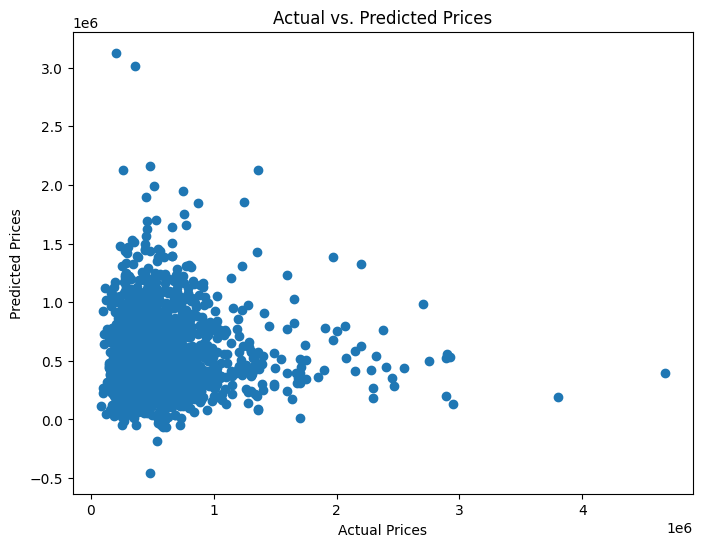

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


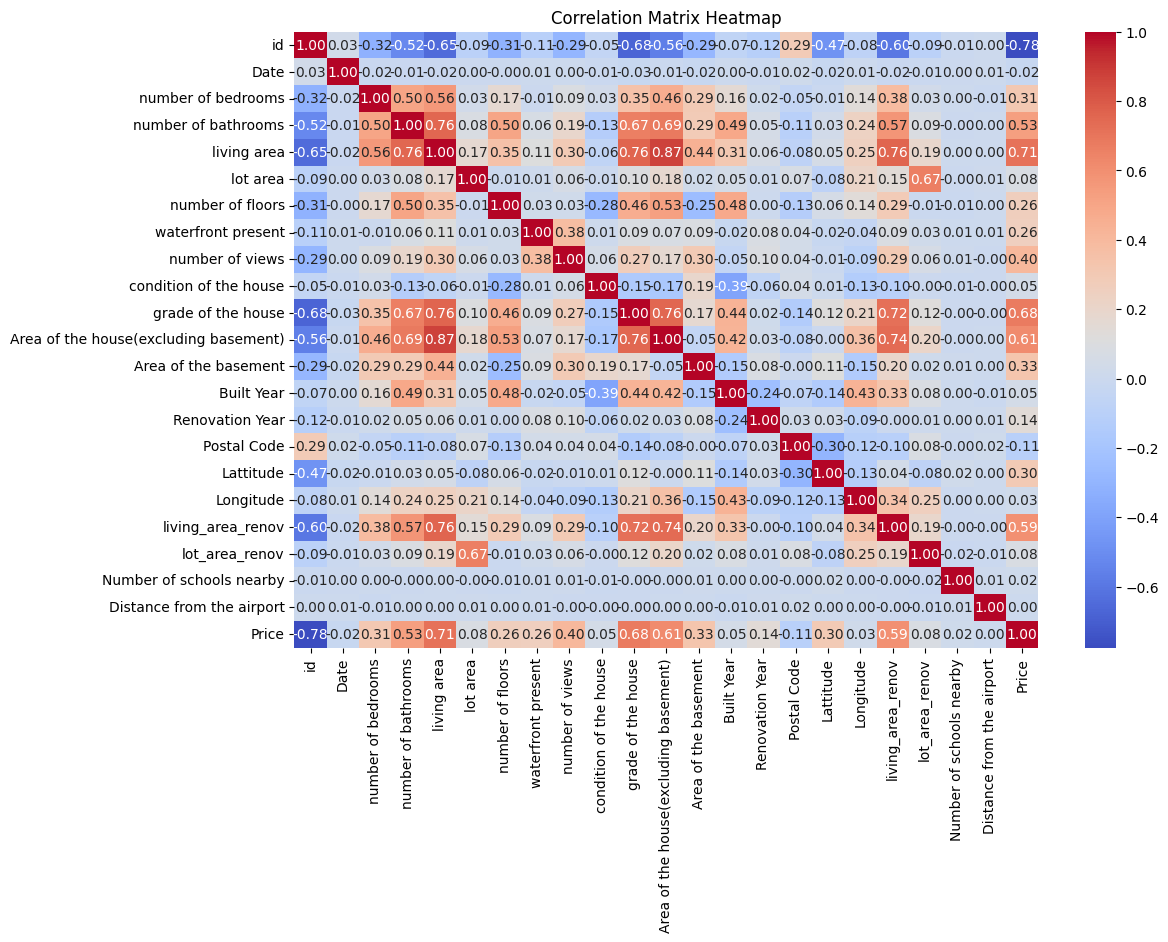

In [28]:
plt.figure(figsize=(12, 8))
corr_matrix = house_price_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


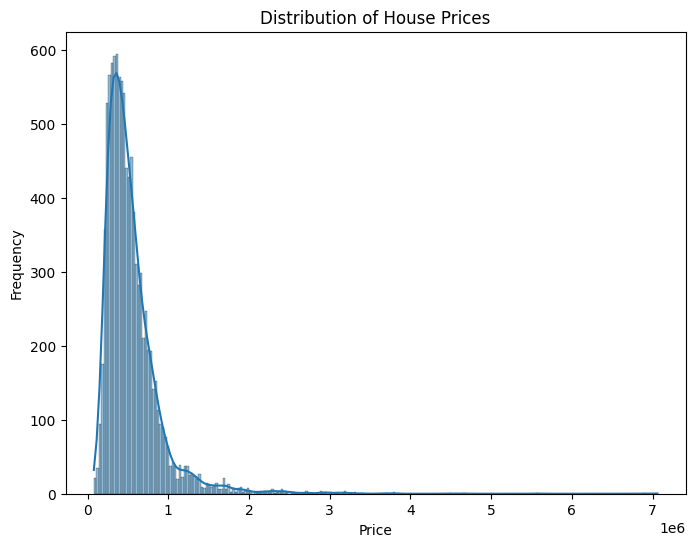

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x1000 with 0 Axes>

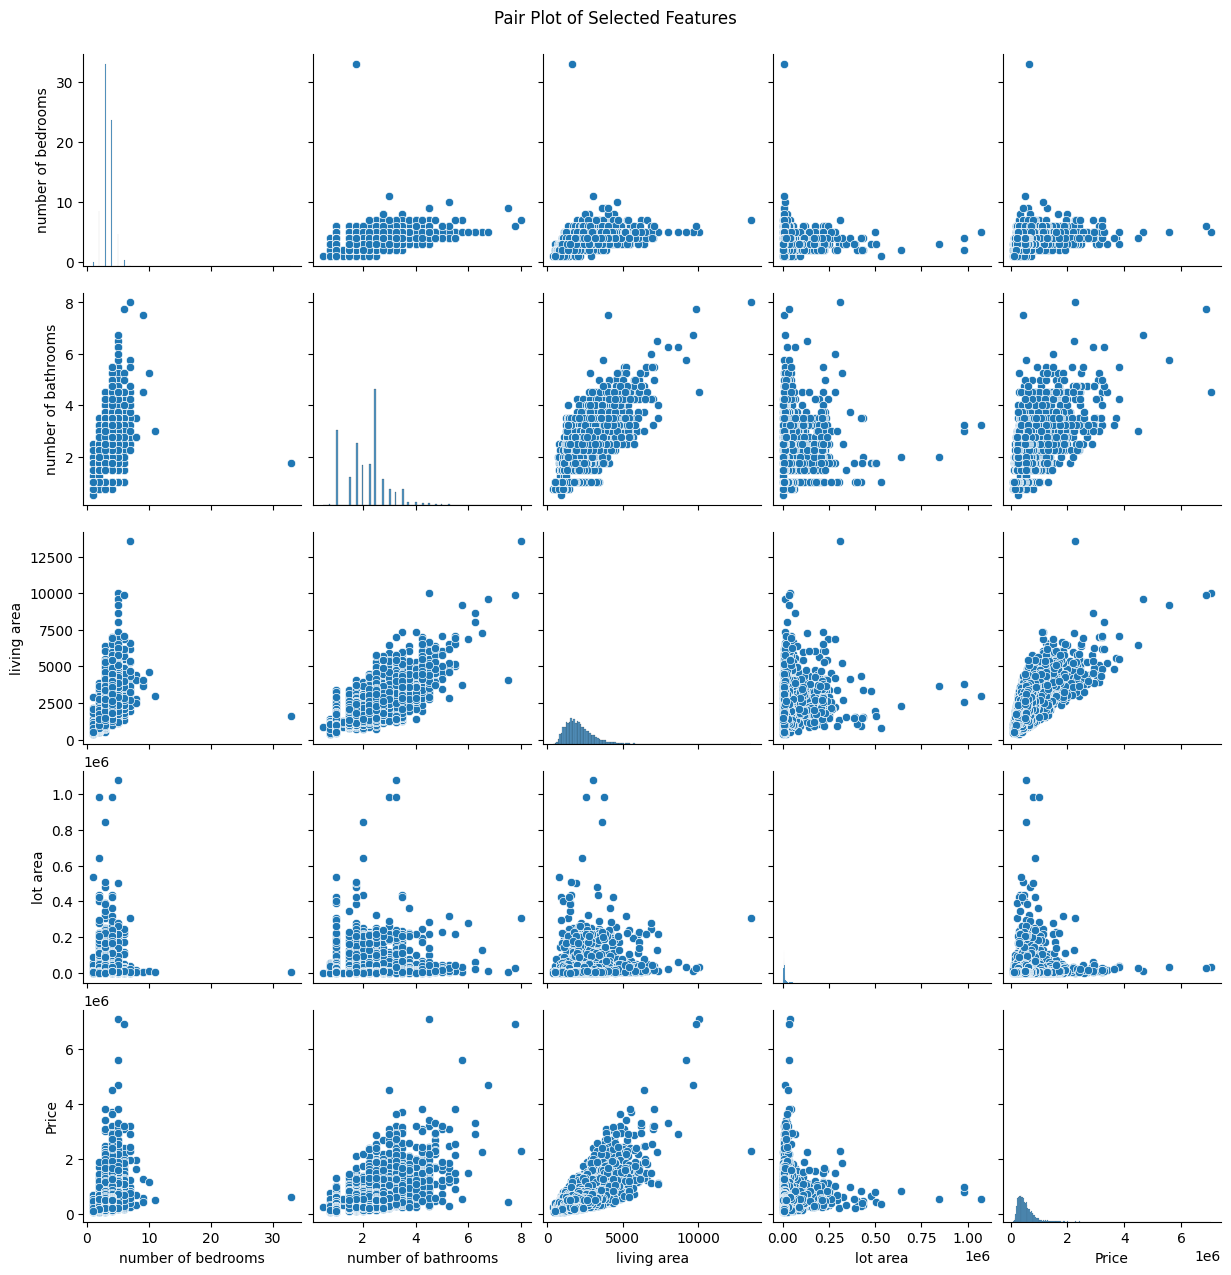

In [30]:
plt.figure(figsize=(10, 10))
sns.pairplot(house_price_df[['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'Price']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


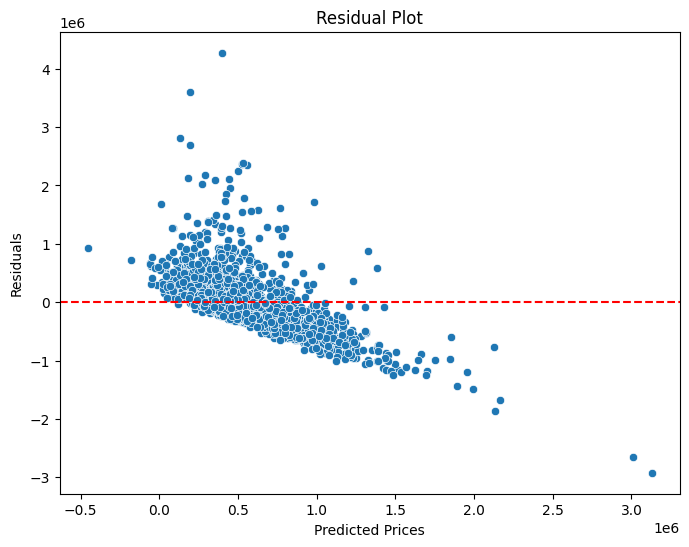

In [31]:
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


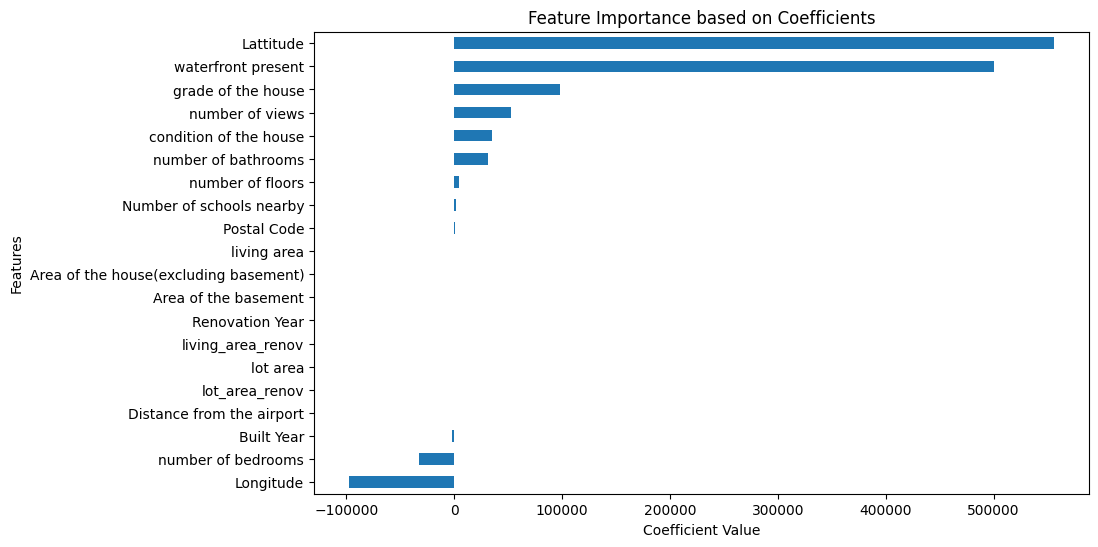

In [32]:
plt.figure(figsize=(10, 6))
coefficients = pd.Series(model.coef_, index=house_price_df.drop(columns=['id', 'Date', 'Price']).columns)
coefficients = coefficients.sort_values()
coefficients.plot(kind='barh')
plt.title('Feature Importance based on Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


In [33]:
print(f'Interpretation of Results:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Accuracy score for regression is considered as R²
accuracy = r2 * 100
print(f'Accuracy Score: {accuracy:.2f}%')


Interpretation of Results:
Mean Squared Error (MSE): 226201931498.15366
R-squared (R²): -0.6792014988113386
Accuracy Score: -67.92%
